In [1]:
# SCENARIO

# The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, 
# you've decided to join a fledgling ride sharing company of your own. In your latest capacity, 
# you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer 
# data-backed guidance on new opportunities for market differentiation.

# You've since been given access to the company's complete recordset of rides. 
# This contains information about every active driver and historic ride, including details like city, 
# driver count, individual fares, and city type.

# =============================================================================================================================
# Analysis
#
# Roughly 81 percent of our drivers account for our urban market. While the remaining 19 percent account for our other two 
# markets.Namely our suburban and rural areas. 
# 
# While 62 percent of our fares are collected in the urban market place there is a substantial percentage of over 30 percent 
# that are collected from our surburban areas. The remainder is collected from the rural marketplace.
# 
# From looking at the data it would appear that there is an underdeveloped market primarly in the surburban areas. 
# By increasing our driver count in that area it should be a possible to grow our market percentage 
# and increase overall growth for Pyber.
# =============================================================================================================================

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
# Read the City and Ride Data
city_df = pd.read_csv("data/city_data.csv")
# print(city_df).head()

ride_df = pd.read_csv("data/ride_data.csv")
# print(ride_df).head()

# Combine the data into a single dataset
merged_df = pd.merge(ride_df,city_df, how ="left", on = ["city", "city"])

# Display the data table for preview
# merged_df.head()

In [4]:
# color scheme dict and preview
# https://www.color-hex.com/color-names.html
color_scheme = {'Gold':'#ffd700', 'Light Sky Blue':'#87CEFA', 'Choral':'#ff7f50'}  

## Bubble Plot of Ride Sharing Data

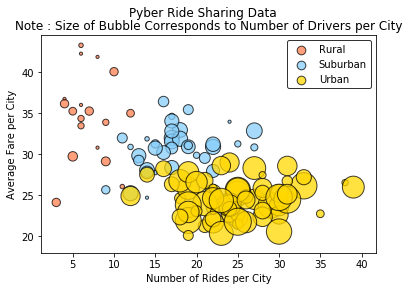

In [5]:
# groupby city name
by_city = merged_df.groupby('city')

# fare by city
avg_fare = by_city.mean()['fare']

# rides by city
ride_count = by_city['ride_id'].count()

# drivers
driver_count = by_city.mean()['driver_count']

# city type 
city_type = city_df.set_index('city')['type']

# df created from above series
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})


city_info.sort_values('Number of Drivers', ascending = False)

# create 3 distinct types for city categories
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

# Color Dict 
city_color = {'Urban': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Choral']}

plt.suptitle('Pyber Ride Sharing Data')

# three scatter plots for each city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

# scatter plot
plt.title('Note : Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()

## Total Fares by City Type

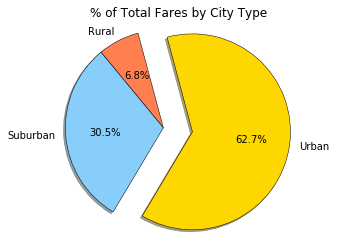

In [6]:
# groupby type 
by_type = merged_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

# total fare by city
fare_sum = by_type.sum()['fare']

# pie chart - I will reuse these for the next cells as well
labels = fare_sum.index
colors = [city_color[n] for n in labels]
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 105, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

## Total Rides by City Type

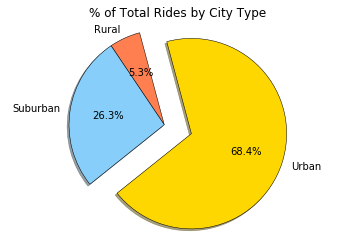

In [7]:
# num of ride per city type   
 
ride_sum = by_type.count()['ride_id']

labels = ride_sum.index
plt.pie(ride_sum, startangle = 105, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

## Total Drivers by City Type

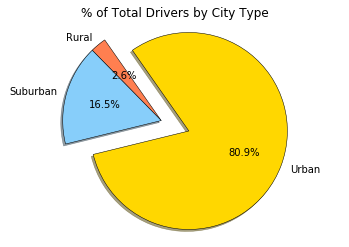

In [8]:
# percent of drivers per city type

driver_sum = city_df.groupby('type').sum()['driver_count']

labels = driver_sum.index
plt.pie(driver_sum, startangle = 125, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()